## House Price Predictions
Different variables come into play in appraising a house, such as the number of bedrooms, square footage, location, and much more. So, our task here is to build a machine learning model to make reasonably accurate predictions in terms of pricing houses. It would be an opportunity for those in real estate to gain more visibility on the market as a whole. In doing so, this notebook will offer a user-friendly explanation through every step using LIME (Local Interpretable Model-agnostic Explanations) principles.


## Table of Contents
1. Environment set-up
    * Importing Libraries
    * Loading the data
2. Initial Diagnostics
    * Glimpse
    * Descriptive Statitics
    * Target Variable Analysis
    * Predictors Analysis
3. Data Cleaning
    * Missing Values
    * Outliers
    * Duplicate Observations
4. Correlation Analysis
    * Correlation Matrix
    * Strongest relationship
5. Inquiry Exploration
    * 
    * 
6. Feature Engineering
    * 
    * 
7. Machine Learning set-up
    * Train-test split
    * Cross-validation
8. Feature Selection

9. Dimensionality Reduction
    * 
    * 
    * 
10. Machine Learning - Simple Models
    * 
    * 
    * 
11. Machine Learning - Ensemble Methods
    * 
    * 
    * 
12. Hyperparameter Tuning
    * 
    * 
12. Model Performance Evaluation
    * 
    *     
13. Recommendation & Conclusion

# 1. Environment Set-up

In [1]:
## Importing Libraries

#Set seed
import random
random.seed(1)

# Manipulating & Visualizing Data
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

In [2]:
## Loading the dataset
df = pd.read_csv("C:/Users/Akoua Orsot/Desktop/ds_projects_data/house_prices/train.csv")
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# 2. Initial Diagnostics

In [3]:
## Glimpse of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Takeaway:** From the glimpse above, we could already draw some observations. 
* Our dataset comprises 1460 rows and 80 columns, making it relatively small, so we would not expect the training process o to be as computationally intensive.
* For null values, most columns appear to have no null values, while null values make up 80% for some of those variables. It indicates that we shall proceed with data cleaning and tidying before doing any statistical analysis or machine learning. 
* In terms of variable type, we have mostly int64, float64, and object. Though 'object' can indicate text or categorical, we will need to investigate further in feature engineering.

In [4]:
## Descriptive Statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Takeaway:** For all 80 variables, the table above captures the basic descriptive statistics showing things like mean, standard deviation, min, max, etc. Commenting on each variable would bring little value to our overall analysis, and so we will zoom on the target variable 'SalePrice'.

In [5]:
# Stats for the target variable
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**Takeaway:** The count indicates no null values in the column. The houses in the dataset vary from ~USD34.9k to ~USD755k, with a mean value of ~USD180k. With the standard deviation at ~USD79k, it appears that prices fluctuate pretty significantly, or we may potentially have houses with exorbitant prices (outliers) skewing the data. We will create a histogram to look at the distribution more closely.

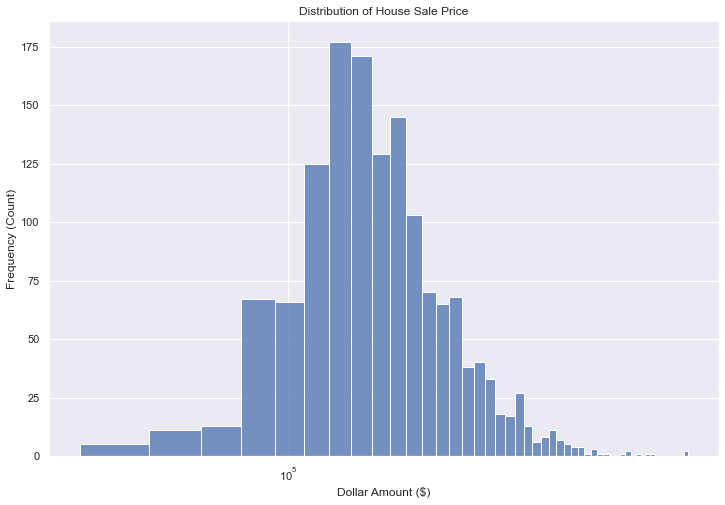

In [7]:
## Feature Variable Analysis
sns.histplot(data=df, x='SalePrice').set(xscale="log")
plt.xlabel("Dollar Amount ($)")
plt.ylabel("Frequency (Count)")
plt.title("Distribution of House Sale Price")
plt.show()